# Unit 6 | Assignment - What's the Weather Like?

## Background

Whether financial, political, or social -- data's true power lies in its ability to answer questions definitively. So let's take what you've learned about Python requests, APIs, and JSON traversals to answer a fundamental question: "What's the weather like as we approach the equator?"

Now, we know what you may be thinking: _"Duh. It gets hotter..."_

But, if pressed, how would you **prove** it?

![Equator](Images/equatorsign.png)

## WeatherPy

In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

Your objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls.
* Include a print log of each city as it's being processed with the city number and city name.
* Save both a CSV of all data retrieved and png images for each scatter plot.

As final considerations:

* You must complete your analysis using a Jupyter notebook.
* You must use the Matplotlib or Pandas plotting libraries.
* You must include a written description of three observable trends based on the data.
* You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.
* See [Example Solution](WeatherPy_Example.pdf) for a reference on expected format.

## Hints and Considerations

* The city data is generated based on random coordinates; as such, your outputs will not be an exact match to the provided starter notebook.

* You may want to start this assignment by refreshing yourself on the [geographic coordinate system](http://desktop.arcgis.com/en/arcmap/10.3/guide-books/map-projections/about-geographic-coordinate-systems.htm).

* Next, spend the requisite time necessary to study the OpenWeatherMap API. Based on your initial study, you should be able to answer  basic questions about the API: Where do you request the API key? Which Weather API in particular will you need? What URL endpoints does it expect? What JSON structure does it respond with? Before you write a line of code, you should be aiming to have a crystal clear understanding of your intended outcome.

* A starter code for Citipy has been provided. However, if you're craving an extra challenge, push yourself to learn how it works: [citipy Python library](https://pypi.python.org/pypi/citipy). Before you try to incorporate the library into your analysis, start by creating simple test cases outside your main script to confirm that you are using it correctly. Too often, when introduced to a new library, students get bogged down by the most minor of errors -- spending hours investigating their entire code -- when, in fact, a simple and focused test would have shown their basic utilization of the library was wrong from the start. Don't let this be you!

* Part of our expectation in this challenge is that you will use critical thinking skills to understand how and why we're recommending the tools we are. What is Citipy for? Why would you use it in conjunction with the OpenWeatherMap API? How would you do so?

* In building your script, pay attention to the cities you are using in your query pool. Are you getting coverage of the full gamut of latitudes and longitudes? Or are you simply choosing 500 cities concentrated in one region of the world? Even if you were a geographic genius, simply rattling 500 cities based on your human selection would create a biased dataset. Be thinking of how you should counter this. (Hint: Consider the full range of latitudes).

* Lastly, remember -- this is a challenging activity. Push yourself! If you complete this task, then you can safely say that you've gained a strong mastery of the core foundations of data analytics and it will only go better from here. Good luck!

# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as owm
from urllib.error import HTTPError
from random import uniform
from datetime import datetime
# Import API key
from Keys import api_key
# Query URL
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid=api_key&units=&q="

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [31]:
# List for holding lat_lngs and cities
lat_lngs = []
new_lats = []
new_longs = []
cities = []
countries = []
temp = []
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    #countries.append(country)
    # If the city is unique, then add it to a our cities list
   #if country not in countries:
     #   countries.append(country)
    if city not in cities:
        cities.append(city)
        countries.append(country)
        new_lats.append(lat_lng[0])
        new_longs.append(lat_lng[1])
   # Print the city count to confirm sufficient count

print(len(cities))
print(len(countries))
print(len(new_lats))
print(len(new_longs))

609
609
609
609


In [32]:
# Use citipy to define city and country from coordinates
# Create a new df

Weather_now_df = pd.DataFrame({"Latitude": new_lats, "Longitude": new_longs, "City":cities})

In [33]:
Weather_now_df.head()

,Latitude,Longitude,City
0,13.551275,84.700088,yanam
1,57.635077,121.007188,khani
2,-13.624099,132.746187,jabiru
3,23.941174,-84.275784,bahia honda
4,-25.596540,-5.457614,jamestown


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [34]:

# Create settings parameters
settings = {"units": "imperial", "appid": api_key}

# Run API calls and collect data
params = ['name','clouds.all','sys.country','dt','main.humidity','main.temp','wind.speed']


for index,row in Weather_now_df.iterrows():
    try:
        city = row['City']
        data = owm.get_current(city, **settings)
        results = data(*params)
        Weather_now_df.at[index,'City'] = (results[0])
        Weather_now_df.at[index,'Cloudiness'] = (int(results[1]))
        Weather_now_df.at[index,'Country'] = (results[2])
        Weather_now_df.at[index,'Date'] = (results[3])
        Weather_now_df.at[index,'Humidity'] = (int(results[4]))
        #Weather_now_df.at[index,'Lng'] = (results[5])
        Weather_now_df.at[index,'Max Temp'] = (results[5])     
        Weather_now_df.at[index,'Wind Speed'] = (results[6])
        print(f"Retrieving Results for Index {index}: {city}.")
        print(f"{url} + {query_url}")
    # Skip the city if an error is encountered
    except(HTTPError): 
        print(f"Processing Record {index}: {city}")
        print(f"Missing field/result for {row['City']}. Skipping.")
        pass
    
# Print notification when complete
print("----------------------------")
print("Data Retrieval Complete     ")

Retrieving Results for Index 0: yanam.
http://api.openweathermap.org/data/2.5/weather? + http://api.openweathermap.org/data/2.5/weather?appid=api_key&units=&q=
Retrieving Results for Index 1: khani.
http://api.openweathermap.org/data/2.5/weather? + http://api.openweathermap.org/data/2.5/weather?appid=api_key&units=&q=
Processing Record 2: jabiru
Missing field/result for jabiru. Skipping.
Retrieving Results for Index 3: bahia honda.
http://api.openweathermap.org/data/2.5/weather? + http://api.openweathermap.org/data/2.5/weather?appid=api_key&units=&q=
Retrieving Results for Index 4: jamestown.
http://api.openweathermap.org/data/2.5/weather? + http://api.openweathermap.org/data/2.5/weather?appid=api_key&units=&q=
Retrieving Results for Index 5: mocuba.
http://api.openweathermap.org/data/2.5/weather? + http://api.openweathermap.org/data/2.5/weather?appid=api_key&units=&q=
Retrieving Results for Index 6: ushuaia.
http://api.openweathermap.org/data/2.5/weather? + http://api.openweathermap.o

In [35]:
# a different approach for practice
# set up lists to hold reponse info

Temperature = []
Humidity = []
Cloudiness = []
WindSpeed = []
Code = []
City_ids=[]
Date=[]




# Loop through the list of cities and perform a request for data on each
for lat, lon in (zip(new_lats,new_longs)):
    query_url = f"{url}appid={api_key}&units={units}&lat={lat}&lon={lon}"
    response=requests.get(query_url).json()
    Temperature.append(response['main']['temp_max'])
    Humidity.append(response['main']['humidity'])
    Cloudiness.append(response['clouds']['all'])
    WindSpeed.append(response['wind']['speed'])
    City_ids.append(response['id'])
    Date.append(response['dt'])
       


In [36]:
print(len(Cloudiness))
print(len(countries))
print(len(Temperature))
print(len(Humidity))
print(len(WindSpeed))
print(len(City_ids))
print(len(Date))

609
609
609
609
609
609
609


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [37]:
Weather_now_df = pd.DataFrame({'City' : cities,
                  'Cloudiness' : Cloudiness,
                  'Country' : countries,
                  'Date' : Date,
                  'Humidty' : Humidity,
                  'Lat' : new_lats,
                  'Lng' : new_longs,
                  'Max_Temp' : Temperature,
                  'Wind Speed' :  WindSpeed,
                  'City_ID' : City_ids,
                  })
Weather_now_df.head()

,City,Cloudiness,Country,Date,Humidty,Lat,Lng,Max_Temp,Wind Speed,City_ID
0,yanam,0,in,1551658076,100,13.551275,84.700088,79.87,4.07,0
1,khani,24,ru,1551658076,61,57.635077,121.007188,1.57,2.73,0
2,jabiru,0,au,1551658076,65,-13.624099,132.746187,84.68,10.22,2068655
3,bahia honda,0,cu,1551658077,96,23.941174,-84.275784,80.05,7.20,0
4,jamestown,80,sh,1551658077,100,-25.596540,-5.457614,77.98,15.82,0


In [38]:
type(cities)

list

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

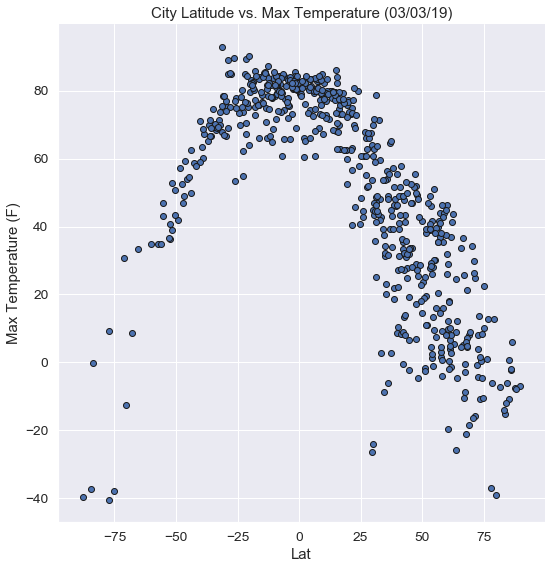

In [52]:
# import seaborn dependencies
import seaborn as sns
#Get today's date
date = datetime.now()
today = date.strftime("%m/%d/%y")

# Build a scatter plot to show the relationship between Temperature (F) vs Latitude
sns.set_style('darkgrid')
sns.set(font_scale=1.25)
sns.lmplot(x='Lat', y='Max_Temp', data=Weather_now_df, fit_reg=False, height = 8, scatter_kws={'alpha':1, 'linewidths':1, 'edgecolor':'k'})

plt.title(f"City Latitude vs. Max Temperature ({today})")
plt.ylabel("Max Temperature (F)")
# Save as png file
plt.savefig("lat_temp.png")
# Show plot
plt.show()

#### Latitude vs. Humidity Plot

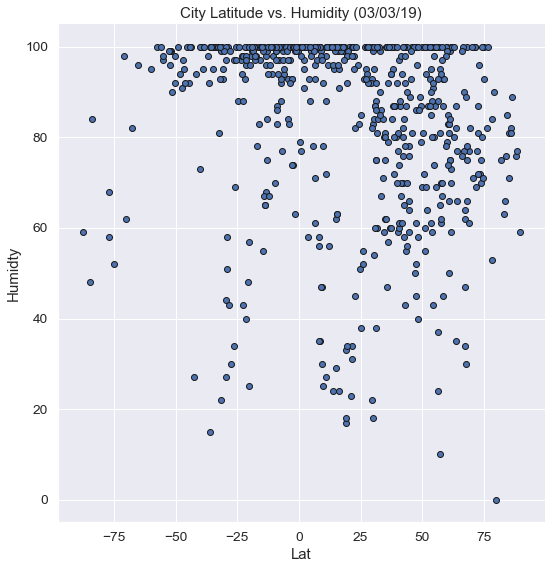

In [54]:
# Build a scatter plot to show the relationship between Humidity vs Latitude
sns.set_style('darkgrid')
sns.set(font_scale=1.25)
sns.lmplot(x='Lat', y='Humidty', data=Weather_now_df, fit_reg=False, height = 8, scatter_kws={'alpha':1, 'linewidths':1, 'edgecolor':'k'})

plt.title(f"City Latitude vs. Humidity ({today})")

# Save as png file
plt.savefig("lat_humidity.png")
# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

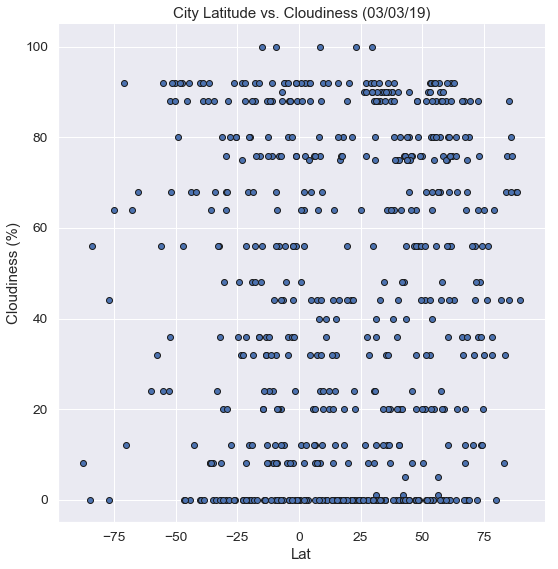

In [58]:
# Build a scatter plot to show the relationship between Cloudiness vs Latitude
sns.set_style('darkgrid')
sns.set(font_scale=1.25)
sns.lmplot(x='Lat', y='Cloudiness', data=Weather_now_df, fit_reg=False, height = 8, scatter_kws={'alpha':1, 'linewidths':1, 'edgecolor':'k'})

plt.title(f"City Latitude vs. Cloudiness ({today})")
plt.ylabel("Cloudiness (%)")

# Save as png file
plt.savefig("lat_cloudiness.png")
# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

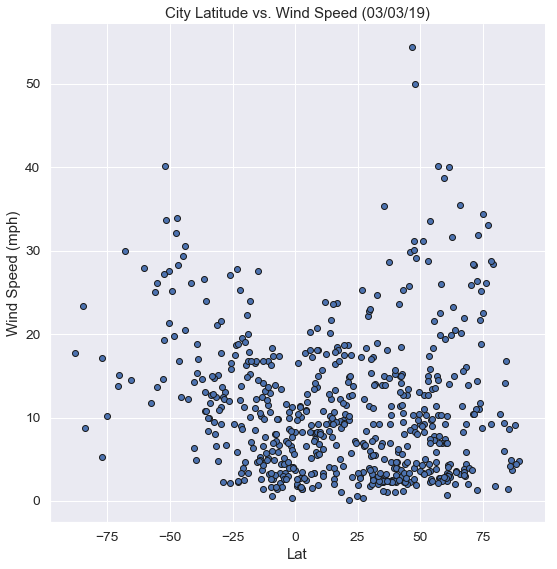

In [61]:
# Build a scatter plot to show the relationship between Wind Speed vs Latitude
sns.set_style('darkgrid')
sns.set(font_scale=1.25)
sns.lmplot(x='Lat', y='Wind Speed', data=Weather_now_df, fit_reg=False, height = 8, scatter_kws={'alpha':1, 'linewidths':1, 'edgecolor':'k'})

plt.title(f"City Latitude vs. Wind Speed ({today})")
plt.ylabel("Wind Speed (mph)")

# Save as png file
plt.savefig("lat_wind.png")
# Show plot
plt.show()